# Movie Budget Data Analysis Project

## In this project we will be answering the following question: 
    How do the directors and producers, cast, production budget, and marketing of a movie impact the success of the movie pre-screening or post-screening?

## We have hypothesized the following: 
    We hypothesize that with better production, societally aware keywords during marketing, and a higher budget, movies will generally be more successful. However, we acknowledge that there are also movies that have a lower budget but more investment into the actors and playing to their genre that can stand as outliers and will need further consideration. 

## Background 
    From past experiences like Avatar big budget movies does not equate to the movie being successful at the box office. Movies can spend money on big names such as The Rock and special effects, but in the long run movies with a better plot have a better chance of making more money in the box office. Indie movies like Get Out that have low budgets and not a list actors have done better than bigger movies released on the same weekend. To confirm such we’ve taken a look at a couple data science projects that have looked into the profitability of movies as in: 
    
[Here](https://www.kaggle.com/param1/the-money-makers) and [here](https://www.kaggle.com/kernels/scriptcontent/1815993)


![alt text](img.jpg "Title")

## **TODO**
1. Load data into pandas 
2. Merge the two datasets on common identifiers
3. Read nested JSON and clean data  
4. Remove noisy/incomplete data
5. Get rudimentary statistics for the dataset
6. Explore basic categories and their direct impact on budgets -> success
    - Visualizations
7. Venture into more latent features
    - Visualizations

In [1]:
%matplotlib inline

import math
import ast
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import patsy
import statsmodels.api as sm


In [2]:
# import csv files
credits = pd.read_csv('data/credits.csv')
keywords = pd.read_csv('data/keywords.csv')
movies_metadata = pd.read_csv('data/movies_metadata.csv')
ratings = pd.read_csv('data/ratings.csv')

tmdb_movies = pd.read_csv('data/tmdb_5000_movies.csv')
credits_1 = pd.read_csv('data/tmdb_5000_credits.csv')

/home/jason/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


The two datasets we are using data from contain nested JSON data and need to be flattened. 

In [3]:
COLS = ["id", "cast", "crew", "keywords", "genres", "production_companies", "production_countries", "belongs_to_collection"]

# Drop rows with nan values
credits = credits.dropna(subset=['id', 'cast', 'crew'])
keywords = keywords.dropna(subset=['id', 'keywords'])
movies_metadata = movies_metadata.dropna(subset=['id', 'genres', 'production_companies', 'production_countries'])

In [4]:
# Flatten dataframes 
def json2dict(jstr):
    if type(jstr) != str: 
        return
    if jstr == np.nan:
        return np.nan
    return ast.literal_eval(jstr)

def checkBudget(budget):
    if str(budget).isdigit():
        return float(budget)
    else:
        return np.nan
    
def checkId(id):
    if str(id).isdigit():
        return int(id)
    else:
        return np.nan

def checkKeywords(keywords):
    if keywords:
        return keywords
    else:
        return np.nan
    
credits.cast = credits.cast.apply(json2dict)
credits.crew = credits.crew.apply(json2dict)
credits.id = credits.id.apply(checkId)

keywords.keywords = keywords.keywords.apply(json2dict)
keywords.keywords = keywords.keywords.apply(checkKeywords)
keywords.id = keywords.id.apply(checkId)
keywords.dropna(inplace=True)

movies_metadata.id = movies_metadata.id.apply(checkId)
movies_metadata.budget = movies_metadata.budget.apply(checkBudget)
movies_metadata.dropna(subset=['id'], inplace=True)
movies_metadata.id = movies_metadata.id.astype(int)
movies_metadata.genres = movies_metadata.genres.apply(json2dict)

movies_metadata.production_companies = movies_metadata.production_companies.apply(json2dict)
movies_metadata.production_countries = movies_metadata.production_countries.apply(json2dict)
movies_metadata.belongs_to_collection = movies_metadata.belongs_to_collection.apply(json2dict)

movies_metadata.dropna(subset=['id'], inplace=True)
movies_metadata.drop(axis=1, columns=['homepage', 'status', 'video', 'poster_path', 'original_title'], inplace=True)
credits.dropna(subset=['id'], inplace=True)
keywords.dropna(subset=['id'], inplace=True)

In [5]:
from functools import reduce
# Merge dataframes
dfs = [credits, keywords, movies_metadata]
df = pd.merge(pd.merge(credits, keywords, on='id'), movies_metadata, on='id')





# Separating Movies by Decade

In [6]:
df['release_date'].fillna("0000-00-00", inplace = True) 

print(df['release_date'].isnull().values.any())
def get_decade(date):
    return int(math.floor(int(date)/10.0) *10.0)


#     return str(date).split('-')[0]
release_dates = df['release_date'].tolist()
release_dates = pd.Series(list(map(lambda x : get_decade(str(x).split('-')[0]), release_dates)))                    
df['decade'] = release_dates

decades = sorted(df.decade.unique())
min_dec = decades[1]
max_dec = decades[len(decades)-1]
df_dec = []
for dec in range(min_dec, max_dec + 1, 10):
    temp_df = df[df['decade'] == dec]
    print("index: " + str((dec-min_dec)/10) + " # of rows in decade " + str(dec) + ": " + str(temp_df.shape[0]))
    df_dec.append(temp_df)
    


False
index: 0.0 # of rows in decade 1870: 2
index: 1.0 # of rows in decade 1880: 4
index: 2.0 # of rows in decade 1890: 58
index: 3.0 # of rows in decade 1900: 62
index: 4.0 # of rows in decade 1910: 91
index: 5.0 # of rows in decade 1920: 303
index: 6.0 # of rows in decade 1930: 1120
index: 7.0 # of rows in decade 1940: 1306
index: 8.0 # of rows in decade 1950: 1699
index: 9.0 # of rows in decade 1960: 1952
index: 10.0 # of rows in decade 1970: 2551
index: 11.0 # of rows in decade 1980: 2764
index: 12.0 # of rows in decade 1990: 4018
index: 13.0 # of rows in decade 2000: 7453
index: 14.0 # of rows in decade 2010: 8338
index: 15.0 # of rows in decade 2020: 1


In [7]:
# df = df[(df['revenue'] > 0) & (df['budget'] > 0)]
# df['profit%'] = (df['revenue'] - df['budget'])/df['budget']

# df.head()

# 1970s

In [8]:
df_dec[10] = df_dec[10][(df_dec[10]['revenue'] > 0) & (df_dec[10]['budget'] > 0)]
df_dec[10]['profit%'] = (df_dec[10]['revenue']-df_dec[10]['budget'])/df_dec[10]['budget']
# df_dec[10]['z'] = (df_dec[10]['profit%']-df_dec[10]['profit%'].mean())/df_dec[10]['profit%'].std()
# df_dec[10] = df_dec[10][(df_dec[10]['z'] < 3) & (df_dec[10]['z'] > -3)]
df_dec[10].describe()
# plt.boxplot(df_dec[10]['profit%'])

,id,budget,revenue,runtime,vote_average,vote_count,decade,profit%
count,182.000000,1.820000e+02,1.820000e+02,182.000000,182.000000,182.000000,182.0,182.000000
mean,13162.791209,6.630636e+06,5.531512e+07,114.137363,6.723626,476.879121,1970.0,31.846197
std,20562.844449,8.191506e+06,8.871674e+07,23.247594,0.849336,918.152184,0.0,90.565288
min,11.000000,5.000000e+00,1.900000e+01,76.000000,3.500000,2.000000,1970.0,-0.999756
25%,1366.250000,1.625000e+06,1.187239e+07,98.250000,6.200000,67.250000,1970.0,1.793336
50%,10659.000000,3.758473e+06,2.742579e+07,111.500000,6.850000,165.500000,1970.0,5.283709
75%,14593.000000,7.980000e+06,5.804281e+07,123.750000,7.400000,484.500000,1970.0,18.048511
max,220002.000000,5.500000e+07,7.753980e+08,225.000000,8.500000,6778.000000,1970.0,699.000000


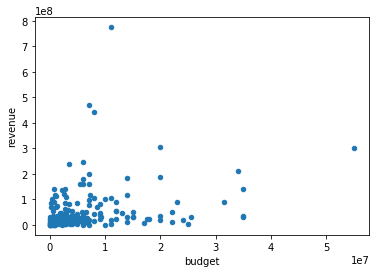

In [9]:
df_dec[10].plot.scatter('budget', 'revenue')

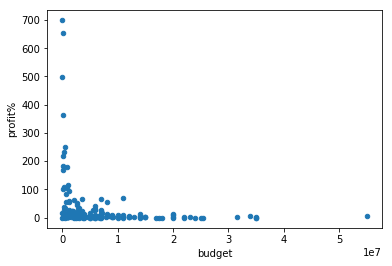

In [10]:
df_dec[10].plot.scatter('budget', 'profit%')

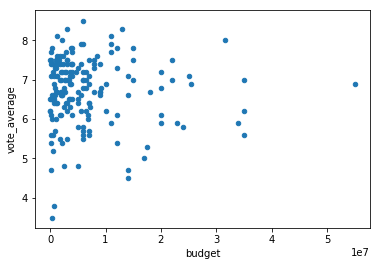

In [11]:
df_dec[10].plot.scatter('budget', 'vote_average')

In [12]:
df_dec[10][df_dec[10]['profit%']  > 100]

,cast,crew,id,keywords,adult,belongs_to_collection,budget,genres,imdb_id,original_language,...,release_date,revenue,runtime,spoken_languages,tagline,title,vote_average,vote_count,decade,profit%
1626,"[{'cast_id': 16, 'character': 'Rocky Balboa', ...","[{'credit_id': '579948e9c3a36874e9007b0b', 'de...",1366,"[{'id': 240, 'name': 'underdog'}, {'id': 276, ...",False,"{'id': 1575, 'name': 'Rocky Collection', 'post...",1000000.0,"[{'id': 18, 'name': 'Drama'}]",tt0075148,en,...,1976-11-21,117235147.0,119.0,"[{'iso_639_1': 'en', 'name': 'English'}]",His whole life was a million-to-one shot.,Rocky,7.5,1843.0,1970,116.235147
1654,"[{'cast_id': 14, 'character': 'Dr. Sam Loomis'...","[{'credit_id': '52fe4291c3a36847f8029049', 'de...",948,"[{'id': 293, 'name': 'female nudity'}, {'id': ...",False,"{'id': 91361, 'name': 'Halloween Collection', ...",300000.0,"[{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...",tt0077651,en,...,1978-10-25,70000000.0,91.0,"[{'iso_639_1': 'en', 'name': 'English'}]",The Night He Came Home,Halloween,7.4,1066.0,1970,232.333333
1985,"[{'cast_id': 8, 'character': 'Divine / Babs Jo...","[{'credit_id': '52fe426bc3a36847f801d203', 'de...",692,"[{'id': 237, 'name': 'gay'}, {'id': 900, 'name...",False,None,12000.0,"[{'id': 27, 'name': 'Horror'}, {'id': 35, 'nam...",tt0069089,en,...,1972-03-12,6000000.0,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",An exercise in poor taste.,Pink Flamingos,6.2,111.0,1970,499.000000
2080,"[{'cast_id': 10, 'character': 'Sally Hardesty'...","[{'credit_id': '52fe44209251416c91005c4f', 'de...",30497,"[{'id': 1420, 'name': 'gas station'}, {'id': 1...",False,"{'id': 111751, 'name': 'Texas Chainsaw Massacr...",85000.0,"[{'id': 27, 'name': 'Horror'}]",tt0072271,en,...,1974-10-01,30859000.0,83.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Who will survive and what will be left of them?,The Texas Chain Saw Massacre,7.1,617.0,1970,362.047059
2869,"[{'cast_id': 16, 'character': 'Curt Henderson'...","[{'credit_id': '52fe427ec3a36847f80232b1', 'de...",838,"[{'id': 455, 'name': 'farewell'}, {'id': 578, ...",False,"{'id': 124950, 'name': 'American Graffiti Coll...",777000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",tt0069704,en,...,1973-08-01,140000000.0,110.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Where were you in '62?,American Graffiti,6.9,330.0,1970,179.180180
3131,"[{'cast_id': 13, 'character': 'Henry Spencer',...","[{'credit_id': '52fe4296c3a36847f802a5dd', 'de...",985,"[{'id': 1009, 'name': 'baby'}, {'id': 1852, 'n...",False,None,10000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 14, 'name...",tt0074486,en,...,1977-03-19,7000000.0,89.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Where your nightmares end...,Eraserhead,7.5,500.0,1970,699.000000
3156,"[{'cast_id': 1, 'character': 'Mad Max Rockatan...","[{'credit_id': '52fe4517c3a36847f80bc041', 'de...",9659,"[{'id': 473, 'name': 'chain'}, {'id': 1009, 'n...",False,"{'id': 8945, 'name': 'Mad Max Collection', 'po...",400000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",tt0079501,en,...,1979-04-12,100000000.0,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",The Maximum Force Of The Future,Mad Max,6.6,1235.0,1970,249.000000
3799,"[{'cast_id': 2, 'character': 'Tang Lung (a.k.a...","[{'credit_id': '52fe44fac3a36847f80b57af', 'de...",9462,"[{'id': 588, 'name': 'rome'}, {'id': 780, 'nam...",False,None,130000.0,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",tt0068935,cn,...,1972-06-01,85000000.0,100.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",The Colosseum . . the battleground of Bruce Le...,The Way of the Dragon,7.4,235.0,1970,652.846154
4577,"[{'cast_id': 3, 'character': 'Joe Curran', 'cr...","[{'credit_id': '52fe4707c3a36847f811fa35', 'de...",46691,"[{'id': 213, 'name': 'upper class'}, {'id': 46...",False,None,106000.0,"[{'id': 18, 'name': 'Drama'}]",tt0065916,en,...,1970-07-15,19319254.0,107.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Keep America Beautiful,Joe,5.4,9.0,1970,181.257113
4697,"[{'cast_id': 3, 'character': 'Narr

# 1980s

In [13]:
df_dec[11] = df_dec[11][(df_dec[11]['revenue'] > 0) & (df_dec[11]['budget'] > 0)]
# budget had the wrong values, updating budget to reflect the new values (source wikipedia)
# karate kid and less than zero
new_column = pd.Series([13000000, 8000000], name='budget', index=[2044, 3517])
df_dec[11].update(new_column)
df_dec[11]['profit%'] = (df_dec[11]['revenue']-df_dec[11]['budget'])/df_dec[11]['budget']
# df_dec[11]['z'] = (df_dec[11]['profit%']-df_dec[11]['profit%'].mean())/df_dec[11]['profit%'].std()
# df_dec[11] = df_dec[11][(df_dec[11]['z'] < 3) & (df_dec[11]['z'] > -3)]
df_dec[11].describe()

,id,budget,revenue,runtime,vote_average,vote_count,decade,profit%
count,502.000000,5.020000e+02,5.020000e+02,502.000000,502.000000,502.000000,502.0,502.000000
mean,13705.543825,1.376319e+07,5.234353e+07,106.444223,6.349203,420.480080,1980.0,4.445748
std,14338.951351,1.154469e+07,8.624906e+07,18.740903,0.918815,755.980707,0.0,9.808684
min,78.000000,4.874000e+04,1.400000e+04,26.000000,2.000000,1.000000,1980.0,-0.998600
25%,3123.000000,5.000000e+06,8.494406e+06,94.000000,5.800000,62.000000,1980.0,-0.129594
50%,10657.000000,1.145000e+07,2.224145e+07,103.000000,6.500000,185.000000,1980.0,1.518745
75%,15595.750000,1.887500e+07,5.660939e+07,115.000000,7.000000,391.000000,1980.0,5.058731
max,109264.000000,7.000000e+07,7.929653e+08,219.000000,8.700000,6239.000000,1980.0,107.644729


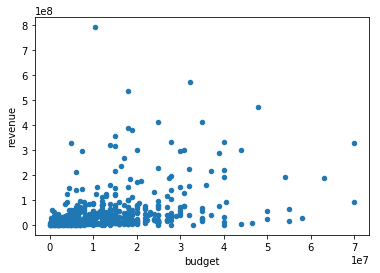

In [14]:
df_dec[11].plot.scatter('budget', 'revenue')

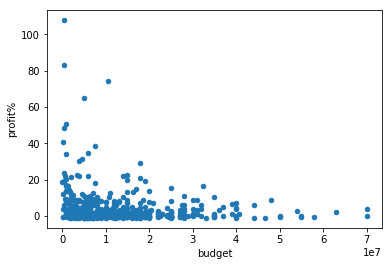

In [15]:
df_dec[11].plot.scatter('budget', 'profit%')

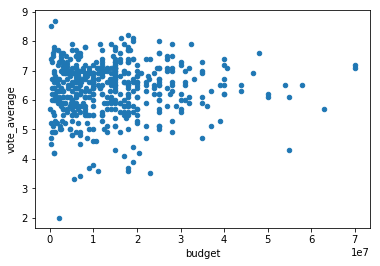

In [16]:
df_dec[11].plot.scatter('budget', 'vote_average')

In [17]:
df_dec[11][df_dec[11]['profit%']  > 100]

,cast,crew,id,keywords,adult,belongs_to_collection,budget,genres,imdb_id,original_language,...,release_date,revenue,runtime,spoken_languages,tagline,title,vote_average,vote_count,decade,profit%
1646,"[{'cast_id': 2, 'character': 'Mrs. Voorhees', ...","[{'credit_id': '52fe43c6c3a36847f806e8f7', 'de...",4488,"[{'id': 793, 'name': 'drowning'}, {'id': 1889,...",False,"{'id': 9735, 'name': 'Friday the 13th Collecti...",550000.0,"[{'id': 27, 'name': 'Horror'}]",tt0080761,en,...,1980-05-09,59754601.0,95.0,"[{'iso_639_1': 'en', 'name': 'English'}]",They were warned...They are doomed...And on Fr...,Friday the 13th,6.4,622.0,1980,107.644729


# 1990s

In [18]:
df_dec[12] = df_dec[12][(df_dec[12]['revenue'] > 0) & (df_dec[12]['budget'] > 0)]
df_dec[12]['profit%'] = (df_dec[12]['revenue']-df_dec[12]['budget'])/df_dec[12]['budget']
# df_dec[12]['z'] = (df_dec[12]['profit%']-df_dec[12]['profit%'].mean())/df_dec[12]['profit%'].std()
# df_dec[12] = df_dec[12][(df_dec[12]['z'] > 3.0e0) & (df_dec[12][df_dec[12]['z'] <  -3.0e0])]
df_dec[12].describe()


,id,budget,revenue,runtime,vote_average,vote_count,decade,profit%
count,892.000000,8.920000e+02,8.920000e+02,892.000000,892.000000,892.000000,892.0,892.000000
mean,14508.890135,3.065608e+07,8.595818e+07,109.890135,6.232960,577.347534,1990.0,7.201625
std,22798.842965,2.849502e+07,1.347693e+08,21.347145,0.932558,1063.589498,0.0,138.472444
min,5.000000,1.000000e+00,1.000000e+00,0.000000,0.000000,0.000000,1990.0,-0.999999
25%,2276.500000,1.000000e+07,9.239705e+06,95.000000,5.700000,71.000000,1990.0,-0.390553
50%,9610.500000,2.300000e+07,2.937582e+07,105.000000,6.300000,218.500000,1990.0,0.796237
75%,13086.250000,4.500000e+07,1.181082e+08,121.000000,6.800000,597.000000,1990.0,2.768412
max,302579.000000,2.000000e+08,1.845034e+09,202.000000,9.100000,9678.000000,1990.0,4132.333333


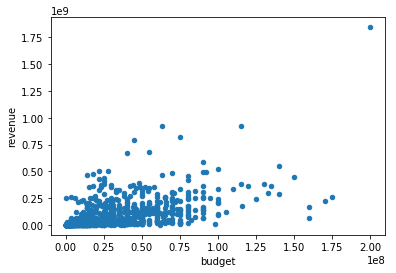

In [19]:
df_dec[12].plot.scatter('budget', 'revenue')

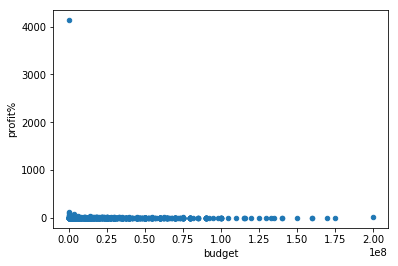

In [20]:
df_dec[12].plot.scatter('budget', 'profit%')

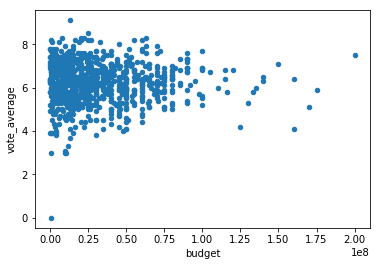

In [21]:
df_dec[12].plot.scatter('budget', 'vote_average')

In [35]:
# the outlier is the blairs witch project
df_dec[12][df_dec[12]['profit%'] > 100]
df_dec[12][df_dec[12]['budget'] > 1.5e8]

,cast,crew,id,keywords,adult,belongs_to_collection,budget,genres,imdb_id,original_language,...,release_date,revenue,runtime,spoken_languages,tagline,title,vote_average,vote_count,decade,profit%
180,"[{'cast_id': 1, 'character': 'Mariner', 'credi...","[{'credit_id': '52fe4530c3a36847f80c1447', 'de...",9804,"[{'id': 270, 'name': 'ocean'}, {'id': 331, 'na...",False,None,175000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",tt0114898,en,...,1995-07-28,2.642182e+08,135.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Beyond the horizon lies the secret to a new be...,Waterworld,5.9,1017.0,1990,0.509818
1308,"[{'cast_id': 1, 'character': 'Annie Porter', '...","[{'credit_id': '557f51349251412f0e00015f', 'de...",1639,"[{'id': 1422, 'name': 'boat'}, {'id': 2799, 'n...",False,"{'id': 43064, 'name': 'Speed Collection', 'pos...",160000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",tt0120179,en,...,1997-06-13,1.645081e+08,121.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...","As the stakes get higher, the ride gets even f...",Speed 2: Cruise Control,4.1,439.0,1990,0.028175
1447,"[{'cast_id': 20, 'character': 'Rose DeWitt Buk...","[{'credit_id': '52fe425ac3a36847f8017985', 'de...",597,"[{'id': 2580, 'name': 'shipwreck'}, {'id': 298...",False,None,200000000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",tt0120338,en,...,1997-11-18,1.845034e+09,194.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Nothing on Earth could come between them.,Titanic,7.5,7770.0,1990,8.225171
2306,"[{'cast_id': 25, 'character': 'Capt. James Wes...","[{'credit_id': '52fe44adc3a36847f80a3bc7', 'de...",8487,"[{'id': 10028, 'name': 'steampunk'}, {'id': 10...",False,None,170000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",tt0120891,en,...,1999-06-29,2.221047e+08,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",It's a whole new west.,Wild Wild West,5.1,1042.0,1990,0.306498
2408,"[{'cast_id': 4, 'character': 'Ahmad Ibn Fadlān...","[{'credit_id': '52fe4321c3a36847f803c6d5', 'de...",1911,"[{'id': 616, 'name': 'witch'}, {'id': 1964, 'n...",False,None,160000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",tt0120657,en,...,1999-08-27,6.169890e+07,102.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Prey for the living.,The 13th Warrior,6.4,524.0,1990,-0.614382


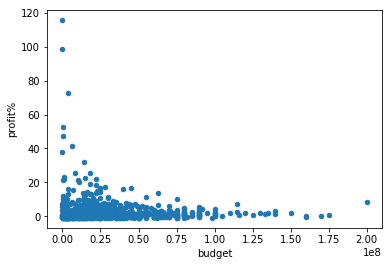

In [23]:
df_dec[12] = df_dec[12].drop([2313])
df_dec[12].plot.scatter('budget', 'profit%')

# 2000s

In [24]:
df_dec[13] = df_dec[13][(df_dec[13]['revenue'] > 0) & (df_dec[13]['budget'] > 0)]
df_dec[13]['profit%'] = (df_dec[13]['revenue']-df_dec[13]['budget'])/df_dec[13]['budget']
df_dec[13].describe()

,id,budget,revenue,runtime,vote_average,vote_count,decade,profit%
count,1676.000000,1.676000e+03,1.676000e+03,1676.000000,1676.000000,1676.000000,1676.0,1.676000e+03
mean,11623.898568,3.889731e+07,9.984078e+07,108.975537,6.196599,738.963007,2000.0,2.518097e+03
std,13054.249291,4.054147e+07,1.654630e+08,19.976075,0.857532,1164.870222,0.0,1.025303e+05
min,12.000000,3.000000e+00,3.000000e+00,42.000000,0.000000,0.000000,2000.0,-9.999995e-01
25%,4126.750000,1.000000e+07,1.246174e+07,95.000000,5.700000,113.750000,2000.0,-1.963522e-01
50%,9976.500000,2.500000e+07,4.241034e+07,105.000000,6.200000,326.000000,2000.0,7.861905e-01
75%,13971.250000,5.500000e+07,1.147051e+08,119.000000,6.800000,851.000000,2000.0,2.518670e+00
max,199160.000000,3.000000e+08,2.787965e+09,224.000000,8.300000,12269.000000,2000.0,4.197476e+06


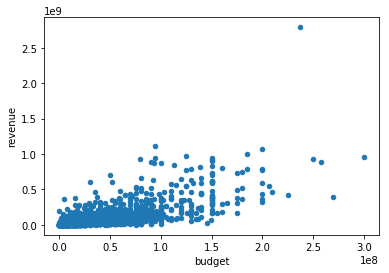

In [25]:
df_dec[13].plot.scatter('budget', 'revenue')

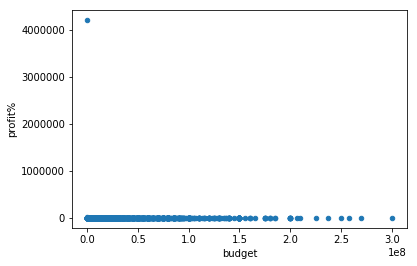

In [26]:
df_dec[13].plot.scatter('budget', 'profit%')

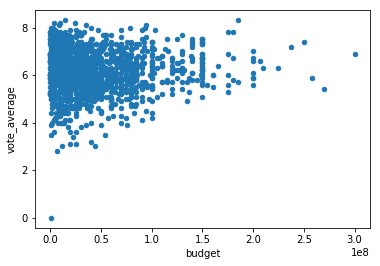

In [27]:
df_dec[13].plot.scatter('budget', 'vote_average')

In [28]:
df_dec[13][df_dec[13]['profit%'] > 100]

,cast,crew,id,keywords,adult,belongs_to_collection,budget,genres,imdb_id,original_language,...,release_date,revenue,runtime,spoken_languages,tagline,title,vote_average,vote_count,decade,profit%
6762,"[{'cast_id': 2, 'character': 'Napoleon Dynamit...","[{'credit_id': '52fe4494c3a36847f809e24f', 'de...",8193,"[{'id': 240, 'name': 'underdog'}, {'id': 380, ...",False,None,400000.0,"[{'id': 35, 'name': 'Comedy'}]",tt0374900,en,...,2004-06-11,46118097.0,95.0,"[{'iso_639_1': 'en', 'name': 'English'}]",He's out to prove he's got nothing to prove.,Napoleon Dynamite,6.7,567.0,2000,1.142952e+02
6806,"[{'cast_id': 1, 'character': 'Himself', 'credi...","[{'credit_id': '52fe44efc3a36847f80b2a9d', 'de...",9372,"[{'id': 1706, 'name': 'experiment'}, {'id': 37...",False,"{'id': 475802, 'name': 'Super Size Me Collecti...",65000.0,"[{'id': 99, 'name': 'Documentary'}, {'id': 35,...",tt0390521,en,...,2004-01-17,28575078.0,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",The first ever reality-based movie ... everyth...,Super Size Me,6.6,520.0,2000,4.386166e+02
7169,"[{'cast_id': 2, 'character': 'Herself', 'credi...","[{'credit_id': '52fe42f7c3a36847f8030443', 'de...",1435,"[{'id': 222, 'name': 'schizophrenia'}, {'id': ...",False,None,218.0,"[{'id': 99, 'name': 'Documentary'}, {'id': 18,...",tt0390538,en,...,2003-10-19,1162014.0,91.0,"[{'iso_639_1': 'en', 'name': 'English'}]",NaN,Tarnation,7.5,22.0,2000,5.329339e+03
8202,"[{'cast_id': 3, 'character': 'Susan Watkins', ...","[{'credit_id': '52fe4215c3a36847f8002991', 'de...",83,"[{'id': 269, 'name': 'diving'}, {'id': 843, 'n...",False,"{'id': 86113, 'name': 'Open Water Collection',...",130000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...",tt0374102,en,...,2004-08-06,54667954.0,79.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Scream all you want.,Open Water,5.3,320.0,2000,4.195227e+02
9205,"[{'cast_id': 1, 'character': 'Reverend Walter ...","[{'credit_id': '5797fe78c3a36828e7004156', 'de...",9687,"[{'id': 2702, 'name': 'golf'}, {'id': 3152, 'n...",False,None,169000.0,"[{'id': 35, 'name': 'Comedy'}]",tt0444653,en,...,2005-12-02,18564702.0,103.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Some family secrets are best kept...buried.,Keeping Mum,6.5,165.0,2000,1.088503e+02
9784,"[{'cast_id': 2, 'character': 'Matt Prater', 'c...","[{'credit_id': '52fe47ab9251416c750a178d', 'de...",18925,"[{'id': 5950, 'name': 'christian'}, {'id': 607...",False,None,100000.0,"[{'id': 18, 'name': 'Drama'}]",tt0805526,en,...,2006-09-29,10178331.0,111.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Never give up. Never back down. Never lose faith.,Facing the Giants,6.6,64.0,2000,1.007833e+02
10192,"[{'cast_id': 21, 'character': 'Guy', 'credit_i...","[{'credit_id': '52fe441cc3a36847f8082d3b', 'de...",5723,"[{'id': 578, 'name': 'rock and roll'}, {'id': ...",False,None,160000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10402, 'n...",tt0907657,en,...,2007-03-23,20710513.0,85.0,"[{'iso_639_1': 'en', 'name': 'English'}]",How often do you find the right person?,Once,7.4,457.0,2000,1.284407e+02
12095,"[{'cast_id': 3, 'character': 'Katie', 'credit_...","[{'credit_id': '52fe4477c3a368484e024b01', 'de...",23827,"[{'id': 10224, 'name': 'haunting'}, {'id': 147...",False,"{'id': 41437, 'name': 'Paranormal Activity Col...",15000.0,"[{'id': 27, 'name': 'Horror'}, {'id': 9648, 'n...",tt1179904,en,...,2007-09-14,193355800.0,86.0,"[{'iso_639_1': 'en', 'name': 'English'}]",What Happens When You Sleep?,Paranormal Activity,5.9,1351.0,2000,1.288939e+04
12232,"[{'cast_id': 5, 'character': 'Chief Comrade Le...","[{'credit_id': '57d001179251416de50020a7', 'de...",14968,"[{'id': 5331, 'name': 'village'}, {'id': 10586...",False,None,8.0,"[{'id': 10752, 'name': 'War'}, {'id': 35, 'nam...",tt0475783,ko,...,2005-08-04,33579813.0,133.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",NaN,Welcome to Dongmakgol,7.7,49.0,2000,4.197476e+06


In [29]:
print(np.corrcoef(df_dec[13]['budget'], df_dec[13]['revenue']))
print(np.corrcoef(df_dec[13]['budget'], df_dec[13]['profit%']))
print(np.corrcoef(df_dec[13]['budget'], df_dec[13]['vote_average']))

[[1.         0.70560632]
 [0.70560632 1.        ]]
[[ 1.         -0.02356293]
 [-0.02356293  1.        ]]
[[1.         0.00285074]
 [0.00285074 1.        ]]


# 2010s

In [30]:
df_dec[14] = df_dec[14][(df_dec[14]['revenue'] > 0) & (df_dec[14]['budget'] > 0)]
df_dec[14]['profit%'] = (df_dec[14]['revenue']-df_dec[14]['budget'])/df_dec[14]['budget']
df_dec[14].describe()

,id,budget,revenue,runtime,vote_average,vote_count,decade,profit%
count,1540.000000,1.540000e+03,1.540000e+03,1540.000000,1540.000000,1540.000000,1540.0,1540.000000
mean,166342.101948,4.093834e+07,1.271330e+08,110.571429,6.289221,1164.944805,2010.0,672.223491
std,115850.687978,5.223003e+07,2.202545e+08,20.528703,0.804471,1632.501477,0.0,25491.042046
min,189.000000,1.000000e+00,1.000000e+00,0.000000,2.300000,1.000000,2010.0,-0.999996
25%,60038.500000,7.500000e+06,7.070136e+06,97.000000,5.800000,167.750000,2010.0,-0.190527
50%,133028.500000,2.000000e+07,4.295173e+07,107.000000,6.300000,549.500000,2010.0,1.108189
75%,270987.000000,5.000000e+07,1.411080e+08,121.000000,6.800000,1471.500000,2010.0,2.996031
max,443319.000000,3.800000e+08,2.068224e+09,338.000000,8.300000,14075.000000,2010.0,999999.000000


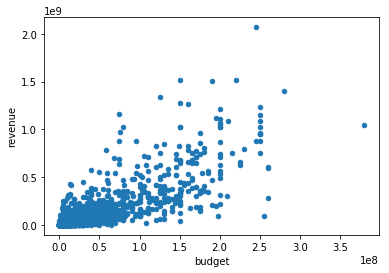

In [31]:
df_dec[14].plot.scatter('budget', 'revenue')

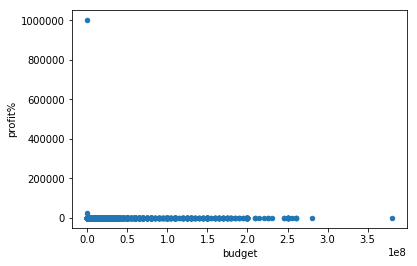

In [32]:
df_dec[14].plot.scatter('budget', 'profit%')

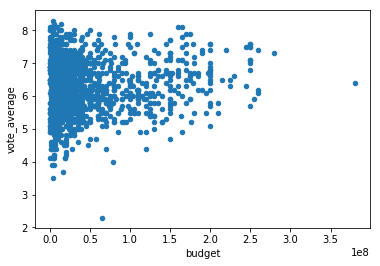

In [33]:
df_dec[14].plot.scatter('budget', 'vote_average')

In [34]:
df_dec[14][df_dec[14]['profit%'] > 100]

,cast,crew,id,keywords,adult,belongs_to_collection,budget,genres,imdb_id,original_language,...,release_date,revenue,runtime,spoken_languages,tagline,title,vote_average,vote_count,decade,profit%
13354,"[{'cast_id': 3, 'character': 'Herself', 'credi...","[{'credit_id': '52fe45fac3a36847f80e56d7', 'de...",42296,"[{'id': 179430, 'name': 'aftercreditsstinger'}]",False,None,30000.0,"[{'id': 99, 'name': 'Documentary'}]",tt1584016,en,...,2010-09-17,3045943.0,87.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Don't let anyone tell you what it is.,Catfish,6.5,201.0,2010,100.531433
13916,"[{'cast_id': 9, 'character': 'Nora', 'credit_i...","[{'credit_id': '52fe47bfc3a36847f8146211', 'de...",50217,"[{'id': 331, 'name': 'tattoo'}, {'id': 1918, '...",False,None,93.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",tt0893412,en,...,2011-01-28,2500000.0,107.0,"[{'iso_639_1': 'en', 'name': 'English'}]",A riches to rags story.,From Prada to Nada,5.0,87.0,2010,26880.720430
15109,"[{'cast_id': 4, 'character': 'Isabella Rossi',...","[{'credit_id': '52fe493dc3a368484e12150f', 'de...",76487,"[{'id': 588, 'name': 'rome'}, {'id': 2626, 'na...",False,None,1000000.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 27, 'n...",tt1560985,en,...,2012-01-06,101758490.0,83.0,"[{'iso_639_1': 'en', 'name': 'English'}]",No soul is safe.,The Devil Inside,4.6,263.0,2010,100.758490
15728,"[{'cast_id': 1, 'character': 'Eva', 'credit_id...","[{'credit_id': '553fa28bc3a3682aed000035', 'de...",59296,"[{'id': 1334, 'name': 'wedding vows'}, {'id': ...",False,None,1.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",tt1436559,en,...,2011-06-03,1378.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Here comes the ride.,"Love, Wedding, Marriage",5.1,73.0,2010,1377.000000
20145,"[{'cast_id': 5, 'character': 'Abby Russell', '...","[{'credit_id': '52fe499cc3a368484e1346b1', 'de...",78383,"[{'id': 428, 'name': 'nurse'}, {'id': 7098, 'n...",False,None,10.0,"[{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...",tt1913166,en,...,2013-09-28,10000000.0,99.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Your pain is her pleasure.,Nurse 3-D,4.9,120.0,2010,999999.000000
23564,"[{'cast_id': 0, 'character': 'Cassidy', 'credi...","[{'credit_id': '54951e4e92514132ed001c81', 'de...",299245,"[{'id': 2125, 'name': 'gallows'}, {'id': 6270,...",False,None,100000.0,"[{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...",tt2309260,en,...,2015-07-10,42664410.0,87.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Every School Has Its Spirit,The Gallows,4.9,370.0,2010,425.644100
29518,"[{'cast_id': 0, 'character': 'Cheon Man-deok',...","[{'credit_id': '56657194c3a368510e001d58', 'de...",363093,"[{'id': 414, 'name': 'hunter'}, {'id': 1262, '...",False,None,5000.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",tt5066556,ko,...,2015-12-16,11083449.0,139.0,"[{'iso_639_1': 'ja', 'name': '日本語'}, {'iso_639...",NaN,The Tiger: An Old Hunter's Tale,7.5,17.0,2010,2215.689800
30031,"[{'cast_id': 2, 'character': 'C', 'credit_id':...","[{'credit_id': '586b6a259251415d31003a69', 'de...",428449,"[{'id': 6095, 'name': 'house'}, {'id': 8508, '...",False,None,100000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 14, 'name...",tt6265828,en,...,2017-07-07,15584255.0,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",It's all about time,A Ghost Story,6.8,95.0,2010,154.842550


In [124]:
print(np.corrcoef(df_dec[14]['budget'], df_dec[14]['revenue']))
print(np.corrcoef(df_dec[14]['budget'], df_dec[14]['profit%']))
print(np.corrcoef(df_dec[14]['budget'], df_dec[14]['vote_average']))

[[1.         0.79316752]
 [0.79316752 1.        ]]
[[ 1.         -0.02061844]
 [-0.02061844  1.        ]]
[[1.         0.06522764]
 [0.06522764 1.        ]]


# Analysis of Charts and Data

We separated the data because of the possible inflation of movie prices and also the amount of money that goes into marketing. In this decade (2010) there are more outlets of advertisement compared to back in the 80s and 90s. We have more television ads, radio ads, internet ads and lots of algorithmic based digital marketing that is able to target specific audiences.

From separating all the data by decades and then analyzing the scatter plots and correlation tests, we can see that the budget has a positive correlation with revenue, but not with voting average and profit margin. However, the data is not normally distributed because the range of budgets is HUGE. A majority of the movies (90%) have budgets less than 1.5 million with  several outliers mainly action and adventure movies having big budgets and and small profit margins because of their budgets. Looking at the outliers, the movies that had the highest profit margin were documentaries with horror-like documentaries (Blair Witch Project, Paranormal Activity etc) being the most successful. These documentaries had low budget given that they do not need a star studded cast or any advanced special effects and post processing which led them to having a high revenue for their given budget in the box office. 

Looking at the voting averages from the scatterplots, a majority of the movies fall between a rating of 6 and 7. Even though the tests show that there is no correlation we can kind of see from the scatterplots, that as budget increases the minimum for voting_average also increases and the range for voting average decreases. With budgets less than 1 million the ratings range between 4 and 9, while anything above the range shrinks to 5 and 8. 

Based on these observations we can somewhat if we were to measure a movie's success based on voter ratings and profit margins, budget has little to no correlation for both. 

Note: There are still entries where the budget or revenue is 0. These need to be dealt with.

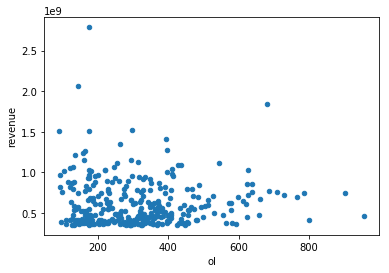

In [36]:
def length(string):
    if isinstance(string, str):
        return len(string)
    else:
        return 0

df = df.assign(ol=df.overview.apply(length))
df[df.revenue > 0.35e9].plot.scatter('ol', 'revenue')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x17eb20400>,
      dtype=object)

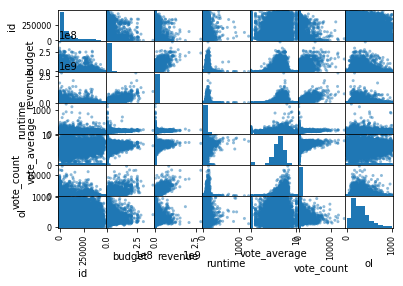

In [54]:
pd.plotting.scatter_matrix(df)

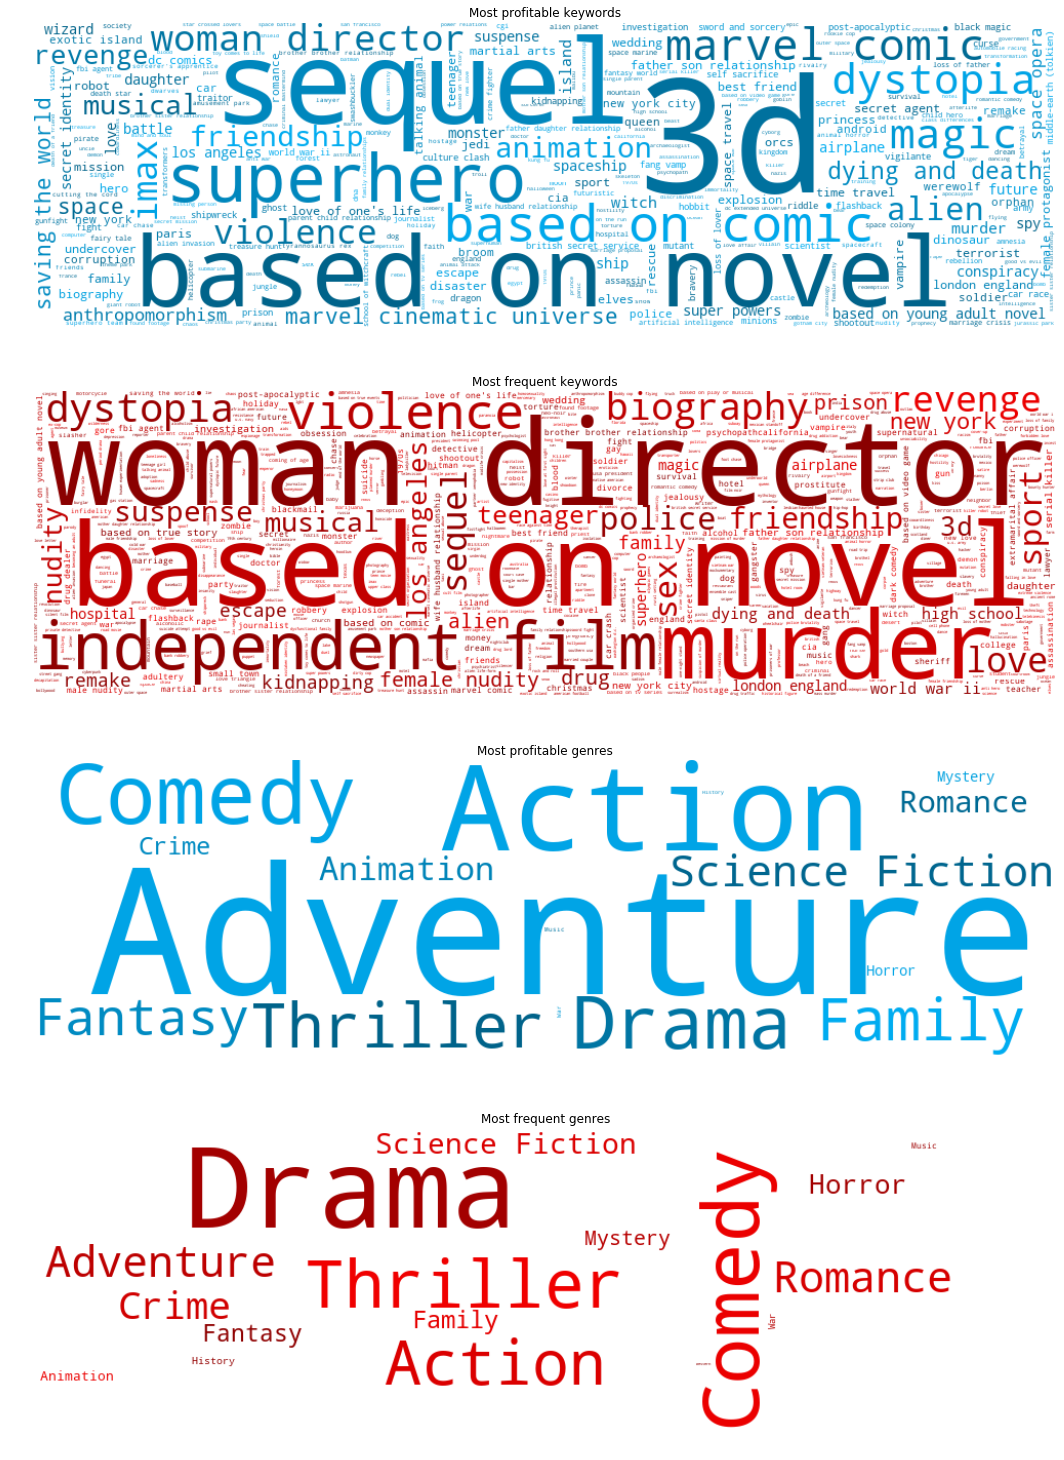

In [119]:
from collections import defaultdict
from wordcloud import WordCloud

kwd_profit = defaultdict(int)
kwd_freq = defaultdict(int)
genre_profit = defaultdict(int)
genre_freq = defaultdict(int)

for row in df[(df.budget > 0) & (df.revenue > 0)].iterrows():
    for kw in row[1]['keywords']:
        if kw['name'] == 'duringcreditsstinger' or kw['name'] == 'aftercreditsstinger':
            continue
        kwd_profit[kw['name']] += (row[1]['revenue'] - row[1]['budget'])
        kwd_freq[kw['name']] += 1
    for genre in row[1]['genres']:
        genre_profit[genre['name']] += (row[1]['revenue'] - row[1]['budget'])
        genre_freq[genre['name']] += 1

def random_color_func(word=None, font_size=None, position=None, 
                      orientation=None, font_path=None, random_state=None):
    h = int(360.0 * tone / 255.0)
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(70, 120)) / 255.0)
    return "hsl({}, {}%, {}%)".format(h, s, l)

wordcloud = WordCloud(width=1000,height=300, background_color='white', 
                      max_words=1000,relative_scaling=1,
                      color_func = random_color_func,
                      normalize_plurals=False)

tone = 140
fig = plt.figure(1, figsize=(36,26))
ax1 = fig.add_subplot(4,1,1)
wordcloud.generate_from_frequencies(kwd_profit)
ax1.imshow(wordcloud, interpolation="bilinear")
ax1.axis('off')
ax1.title.set_text('Most profitable keywords')

tone = 255
ax2 = fig.add_subplot(4,1,2)
wordcloud.generate_from_frequencies(kwd_freq)
ax2.imshow(wordcloud, interpolation="bilinear")
ax2.axis('off')
ax2.title.set_text('Most frequent keywords')

tone = 140
ax3 = fig.add_subplot(4,1,3)
wordcloud.generate_from_frequencies(genre_profit)
ax3.imshow(wordcloud, interpolation="bilinear")
ax3.axis('off')
ax3.title.set_text('Most profitable genres')

tone = 255
ax4 = fig.add_subplot(4,1,4)
wordcloud.generate_from_frequencies(genre_freq)
ax4.imshow(wordcloud, interpolation="bilinear")
ax4.axis('off')
ax4.title.set_text('Most frequent genres')

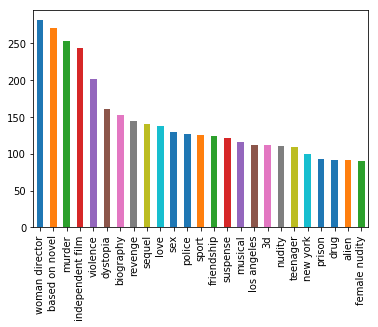

In [133]:
kwd_freq = dict(kwd_freq)
kwd_series = pd.Series(kwd_freq).sort_values(ascending=False)
kwd_series[:25].plot('bar')

## Conclusion
    In conclusion, we sought to find a relationship between the budget of movies in each decade and the success garnered in the box office for each decade. By splitting up the movies by decade, we were able to measure the budget, profit, and revenue for movies based in each decade. After doing some analysis, there is no linear relationship between the budget of the movies and the success of the movies. A movie's budget does not correlate to its success in the box office. However, we discovered that there is a relationship between voter ratings and profit margins. A movie's success is more determinant on voter ratings and profit margins rather than the movie's budget. 
    One limitation of our project was that our dataset did not contain all of the movies possible. We initially had 5,000 movies before data cleaning, so we could only work with those 5,000 movies. Another limiation of our project was that there may have been bias in our dataset. Because of the potential bias, we could have been working with data that may not be completely accurate. Conducting research on movies and their success depicts how a movie's budget impacts whether or not people will be likely to see a certain movie. Since box office results require the audience to see the movie, it is critical for a movie to have an audience in order to measure box office success. All in all, movies have played a cultural role in people's lives in society.